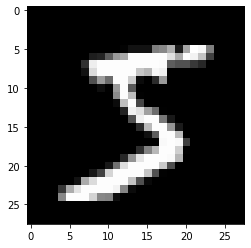

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 255
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()



In [12]:
# global config

sigmoid = lambda x: 1.0/(1.0 + np.exp(-x))

def calc_cost(A4,label_set):
    print("shape", A4.shape, label_set.shape)
    sum = 0
    for image in range(A4.shape[1]):
        X = A4[:,image]-label_set[image]
        
        sum += np.sum(X ** 2)
    return sum

     #epoch is: 0
# shape (784, 100) (10, 100) (100, 10, 1)
# temp cost is:  3553.519211106437



In [6]:
# Step 2

train_first_100 = []
train_first_100_labels = []
for i in range(100):
    train_first_100.append(train_set[i][0])
    train_first_100_labels.append(train_set[i][1])

train_first_100 = np.array(train_first_100).reshape((100,784)).transpose()
train_first_100_labels = np.array(train_first_100_labels).reshape((100,10)).transpose()


# define each layer neurons
Layer1Neurons = 784
Layer2Neurons = 16
Layer3Neurons = 16
Layer4Neurons = 10

# define each layer Biases
B2 = np.zeros((Layer2Neurons,1))
B3 = np.zeros((Layer3Neurons,1))
B4 = np.zeros((Layer4Neurons,1))

# define wights between each layer
W1 = np.random.normal(0,1,(Layer2Neurons, Layer1Neurons))
W2 = np.random.normal(0,1,(Layer3Neurons, Layer2Neurons))
W3 = np.random.normal(0,1,(Layer4Neurons, Layer3Neurons))

#define activation of each layer

A2 = sigmoid(W1 @ train_first_100 + B2) 
A3 = sigmoid(W2 @ A2  + B3)
A4 = sigmoid(W3 @ A3 + B4)

correct_answers = 0
for i in range(100):
    detected_class = A4[:,i].argmax()
    if(detected_class == train_first_100_labels[:,i].argmax()):
        correct_answers += 1
        
print('accuracy: ' + str(correct_answers) + '%')



accuracy: 6%


epoch is: 0
shape (10, 100) (100, 10)
temp cost is:  91.33444230873337
epoch is: 1
shape (10, 100) (100, 10)
temp cost is:  87.92250882460786
epoch is: 2
shape (10, 100) (100, 10)
temp cost is:  84.35126720546633
epoch is: 3
shape (10, 100) (100, 10)
temp cost is:  82.05891086958846
epoch is: 4
shape (10, 100) (100, 10)
temp cost is:  79.21497989901982
epoch is: 5
shape (10, 100) (100, 10)
temp cost is:  78.83731424770912
epoch is: 6
shape (10, 100) (100, 10)
temp cost is:  74.91461415698298
epoch is: 7
shape (10, 100) (100, 10)
temp cost is:  73.1553436491923
epoch is: 8
shape (10, 100) (100, 10)
temp cost is:  70.63381428946718
epoch is: 9
shape (10, 100) (100, 10)
temp cost is:  68.1400181671105
epoch is: 10
shape (10, 100) (100, 10)
temp cost is:  66.62624658397007
epoch is: 11
shape (10, 100) (100, 10)
temp cost is:  64.94206438000528
epoch is: 12
shape (10, 100) (100, 10)
temp cost is:  63.76448421750787
epoch is: 13
shape (10, 100) (100, 10)
temp cost is:  61.58353846486581
epoc

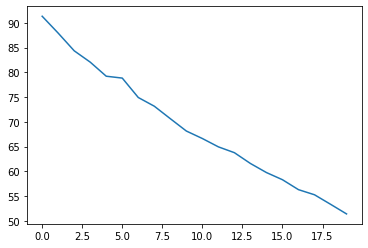

In [15]:
# Step 3
def extract_batch(dataset, index, batch_size):
    X, y = [], []
    min_ = min(batch_size * (index + 1), len(dataset))
    tmp = dataset[index * batch_size: min_]
    for img, label in tmp:
        X.append(img)
        y.append(label)
    return np.array(X).reshape(len(tmp),784).transpose(), np.array(y).reshape(len(tmp),10), len(tmp)
    

# define each layer Biases
B2 = np.zeros((Layer2Neurons,1))
B3 = np.zeros((Layer3Neurons,1))
B4 = np.zeros((Layer4Neurons,1))

# define wights between each layer
W1 = np.random.normal(0,1,(Layer2Neurons, Layer1Neurons))
W2 = np.random.normal(0,1,(Layer3Neurons, Layer2Neurons))
W3 = np.random.normal(0,1,(Layer4Neurons, Layer3Neurons))


def delta_1(j,image,A4,label_set, A3, A2):
    term = 0
    for i in range(Layer4Neurons):
        for k in range(Layer3Neurons):
            term += 2 * (A4[:,image][i]  - label_set[image,i]) * A4[:,image][i] * (1-A4[:,image][i]) * W3[i,k] * A3[:,image][k] * (1-A3[:,image][k]) * W2[k,j] * A2[:, image][j] * (1-A2[:, image][j])
    return term

def delta_2(j,image,A4,label_set, A3):
    term = 0
    for i in range(Layer4Neurons):
        term += 2 * (A4[:,image][i]  - label_set[image,i]) * A4[:,image][i] * (1-A4[:,image][i]) * W3[i,j] * A3[:,image][j] * (1 - A3[:,image][j])
    return term

def delta_3(j,image, A4,label_set):
    return 2 * (A4[:,image][j]  - label_set[image,j]) * A4[:,image][j] * (1-A4[:,image][j])


batch_size = 10
learning_rate = 1
epochs = 20
phase_3_train_set = train_set[:100]
epoch_costs = []
for epoch in range(epochs):
    # print(">>batch", batch_num)
    batch_num = 0
    for batch_num in range(10):
        temp_batch_data , temp_batch_label, temp_batch_size = extract_batch(phase_3_train_set, batch_num,batch_size)

        # define derrivative of each layer for bias
        d_B2 = np.zeros((Layer2Neurons,1))
        d_B3 = np.zeros((Layer3Neurons,1))
        d_B4 = np.zeros((Layer4Neurons,1))

        # define derivative for wights of layers
        d_W1 = np.zeros((Layer2Neurons, Layer1Neurons))
        d_W2 = np.zeros((Layer3Neurons, Layer2Neurons))
        d_W3 = np.zeros((Layer4Neurons, Layer3Neurons))

        #calculate activation of each layer
        A2 = sigmoid(W1 @ temp_batch_data + B2) 
        A3 = sigmoid(W2 @ A2 + B3) 
        A4 = sigmoid(W3 @ A3 + B4) 
        for image in range(len(temp_batch_data[0])):
            for j in range(Layer2Neurons):
                delta_1_JIMAGE = delta_1(j, image,A4,temp_batch_label,A3, A2)
                d_B2[j] +=  delta_1_JIMAGE
                for k in range(Layer1Neurons):
                    d_W1[j,k] += temp_batch_data[:, image][k] * delta_1_JIMAGE


            for j in range(Layer3Neurons):
                delta_2_JIMAGE = delta_2(j, image,A4, temp_batch_label, A3)
                d_B3[j] += delta_2_JIMAGE
                for k in range(Layer2Neurons):
                    d_W2[j,k] += A2[:, image][k] * delta_2_JIMAGE

            for j in range(Layer4Neurons):
                delta_3_JIMAGE = delta_3(j, image, A4,temp_batch_label)
                d_B4[j] += delta_3_JIMAGE
                for k in range(Layer3Neurons):
                    d_W3[j,k] += A3[:, image][k] * delta_3_JIMAGE
        W1 -= learning_rate * d_W1 / batch_size
        W2 -= learning_rate * d_W2 / batch_size
        W3 -= learning_rate * d_W3 / batch_size
        B2 -= learning_rate * d_B2 / batch_size
        B3 -= learning_rate * d_B3 / batch_size
        B4 -= learning_rate * d_B4 / batch_size

    # calculate temporary cost
    train_, label_, l = extract_batch(phase_3_train_set,0,100)
    A2 = sigmoid(W1 @ train_  + B2)
    A3 = sigmoid(W2 @ A2 + B3) 
    A4 = sigmoid(W3 @ A3 + B4) 
    print('epoch is:', epoch)
    cost = calc_cost(A4,label_)
    epoch_costs.append(cost)
    print("temp cost is: ", cost)
    np.random.shuffle(phase_3_train_set)

# test accuracy on train set
train_, labels_, size = extract_batch(phase_3_train_set, 0, 100)
A2 = sigmoid(W1 @ train_ + B2) 
A3 = sigmoid(W2 @ A2 + B3) 
A4 = sigmoid(W3 @ A3  + B4)

# now Z4 contains all the outputs of 100 images we selected
# and its shape is 10*100
correct_answers = 0
for i in range(100):
    detected_class = A4[:,i].argmax()
    if(detected_class == labels_[i].argmax()):
        correct_answers += 1
print('accuracy: ' + str(correct_answers) + '%')

from matplotlib import pyplot as plt
plt.plot(epoch_costs)



In [18]:
# Phase 4
def extract_batch(dataset, index, batch_size):
    X, y = [], []
    min_ = min(batch_size * (index + 1), len(dataset))
    tmp = dataset[index * batch_size: min_]
    for img, label in tmp:
        X.append(img)
        y.append(label)
    return np.array(X).reshape(len(tmp),784).transpose(), np.array(y).transpose().reshape((Layer4Neurons,batch_size)), len(tmp)

# define each layer Biases
B2 = np.zeros((Layer2Neurons,1))
B3 = np.zeros((Layer3Neurons,1))
B4 = np.zeros((Layer4Neurons,1))

# define wights between each layer
W1 = np.random.normal(0,1,(Layer2Neurons, Layer1Neurons))
W2 = np.random.normal(0,1,(Layer3Neurons, Layer2Neurons))
W3 = np.random.normal(0,1,(Layer4Neurons, Layer3Neurons))


batch_size = 50
learning_rate = 1
epochs = 5
phase_4_train_set = train_set
epoch_costs = []
for epoch in range(epochs):
  
    np.random.shuffle(phase_4_train_set)
    # print(">>batch", batch_num)
    # batch_num = 0
    for batch_num in range(len(phase_4_train_set)//batch_size):
        temp_batch_data , temp_batch_label, temp_batch_size = extract_batch(phase_4_train_set, batch_num,batch_size)

        # define derrivative of each layer for bias
        d_B2 = np.zeros((Layer2Neurons,1))
        d_B3 = np.zeros((Layer3Neurons,1))
        d_B4 = np.zeros((Layer4Neurons,1))

        # define derivative for wights of layers
        d_W1 = np.zeros((Layer2Neurons, Layer1Neurons))
        d_W2 = np.zeros((Layer3Neurons, Layer2Neurons))
        d_W3 = np.zeros((Layer4Neurons, Layer3Neurons))

        #calculate activation of each layer
        A2 = sigmoid(W1 @ temp_batch_data + B2) 
        A3 = sigmoid(W2 @ A2 + B3) 
        A4 = sigmoid(W3 @ A3 + B4)
        delta_3 = 2 * (A4 - temp_batch_label) * A4 * (1-A4)
        delta_2 = A3 * (1-A3) * (W3.transpose() @ delta_3) 
        delta_1 = A2 * (1-A2) * (W2.transpose() @ delta_2)

        d_W3 = delta_3 @ A3.transpose()
        d_W2 = delta_2 @ A2.transpose()
        d_W1 = delta_1 @ temp_batch_data.transpose()
    
        d_B2 = delta_1.sum(axis=1).reshape((16,1))
        d_B3 = delta_2.sum(axis=1).reshape((16,1))
        d_B4 = delta_3.sum(axis=1).reshape((10,1))

        W1 -= learning_rate * d_W1 / batch_size
        W2 -= learning_rate * d_W2 / batch_size
        W3 -= learning_rate * d_W3 / batch_size
        B2 -= learning_rate * d_B2 / batch_size
        B3 -= learning_rate * d_B3 / batch_size
        B4 -= learning_rate * d_B4 / batch_size

    # calculate temporary cost
    train_, label_, l = extract_batch(phase_4_train_set,0,len(phase_4_train_set))
    A2 = sigmoid(W1 @ train_  + B2)
    A3 = sigmoid(W2 @ A2 + B3)
    A4 = sigmoid(W3 @ A3 + B4)
    print('epoch is:', epoch)
    cost = ((A4 - label_ )**2).sum()/60000
    epoch_costs.append(cost)
    print("temp cost is: ", cost)



epoch is: 0
temp cost is:  0.37699721372193934
epoch is: 1
temp cost is:  0.2369148752092338
epoch is: 2
temp cost is:  0.19450535173711403
epoch is: 3
temp cost is:  0.17076627121410354
epoch is: 4
temp cost is:  0.15838677918633834


train accuracy: 0.9000166666666667
test accuracy: 0.8987


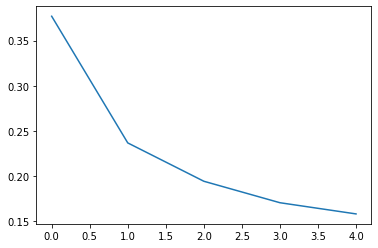

In [19]:
# Phase 5

# evaluate accuracy on train set
train_, labels_, size = extract_batch(phase_4_train_set, 0, len(phase_4_train_set))
A2 = sigmoid(W1 @ train_ + B2) 
A3 = sigmoid(W2 @ A2 + B3) 
A4 = sigmoid(W3 @ A3  + B4)

#train accuracy
correct_answers = 0
for i in range(len(phase_4_train_set)):
    detected_class = A4[:,i].argmax()
    if(detected_class == labels_[:,i].argmax()):
        correct_answers += 1
print('train accuracy: ' + str(correct_answers/len(phase_4_train_set)))

# evaluate accuracy on train set
phase_5_test_set = test_set
test_, labels_, size = extract_batch(phase_5_test_set, 0, len(phase_5_test_set))
A2 = sigmoid(W1 @ test_ + B2) 
A3 = sigmoid(W2 @ A2 + B3) 
A4 = sigmoid(W3 @ A3  + B4)

#test accuracy
correct_answers = 0
for i in range(len(phase_5_test_set)):
    detected_class = A4[:,i].argmax()
    if(detected_class == labels_[:,i].argmax()):
        correct_answers += 1
print('test accuracy: ' + str(correct_answers/len(phase_5_test_set)))

plt.plot(epoch_costs)